#### 数据增广演示

**构建数据增广预处理网路**
+ 输入层：$150\times 150\times 3$
+ 随机旋转层：$-6.88^\circ \sim 6.88^\circ$
+ 随机水平翻转层
+ 随机缩放层：$-20\% \sim 20\%$


In [11]:
from tensorflow.keras import layers
from tensorflow.keras import models

data_augmentation = models.Sequential(name='Data Augmentation')
data_augmentation.add(layers.Input(shape=(150,150,3)))
data_augmentation.add(layers.RandomRotation(factor=(-0.12,+0.12)))
data_augmentation.add(layers.RandomFlip(mode='horizontal'))
data_augmentation.add(layers.RandomZoom(height_factor=(-0.2, 0.2)))

data_augmentation.summary()

Model: "Data Augmentation"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_rotation_4 (RandomRo  (None, 150, 150, 3)      0         
 tation)                                                         
                                                                 
 random_flip_4 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


**读取和显示图像**

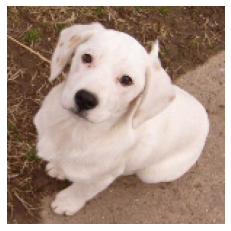

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

img = tf.io.read_file(filename='cats_and_dogs_small/test/dogs/dog.1512.jpg')
img = tf.image.decode_jpeg(img, channels=0)/255
img = tf.image.resize(img,[150,150])

plt.imshow(img); plt.axis(False)
plt.show()

**演示预处理网络**

+ 使用预处理网络处理12次，输入为同一幅图像
+ 显示每一次的输出图像

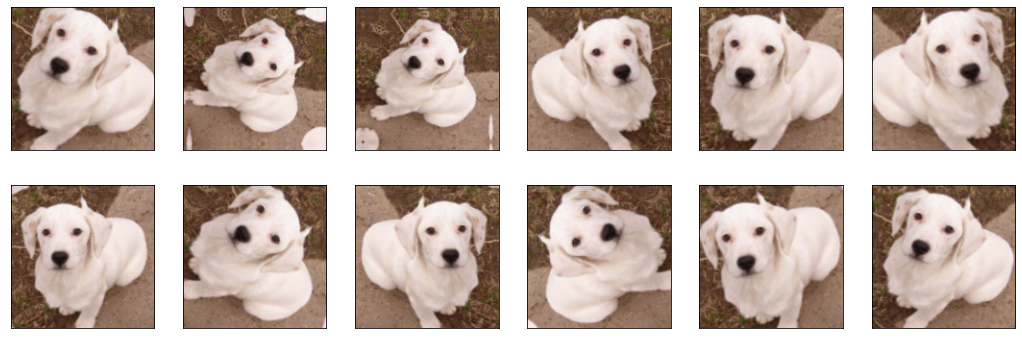

In [13]:
fig, axes = plt.subplots(2,6,figsize=(18,6),subplot_kw={'xticks':(), 'yticks':()})

for ax in axes.ravel():
    augmented_img = data_augmentation(tf.reshape(img,[1,150,150,3]))
    ax.imshow(augmented_img[0,:,:,:].numpy())

plt.show()